This notebook describes how to run experiments to test different transformations on various features in input and
output data. The AI4Water packae needs to be installed properly.

In [1]:
import site
import os
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')

import matplotlib.pyplot as plt

from AI4Water.experiments import TransformationExperiments
from AI4Water.data import load_30min






**********Pytorch models could not be imported **********



In [2]:
data = load_30min()

data.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,target3,target4,target5,target6,target7,target8,target9,target10,target11,target12
Date_Time2,,,,,,,,,,,,,,,,,,,,,
2018-06-19 00:00:00,36.407149,19.321232,33.956058,19.780000,0.0,0.0,0.0,0.0,159.533333,0.960000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 00:30:00,35.562515,19.320124,33.950508,19.093333,0.0,0.0,0.0,0.0,86.596667,0.163333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:00:00,34.808016,19.319666,33.942532,18.733333,0.0,0.0,0.0,0.0,2.260000,0.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:30:00,30.645216,19.320406,33.931263,18.760000,0.0,0.0,0.0,0.0,62.710000,0.193333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 02:00:00,26.608980,19.326729,33.917961,18.633333,0.0,0.0,0.0,0.0,63.446667,0.510000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
inputs = [col for col in data.columns if 'input' in col]
inputs

['input1',
 'input2',
 'input3',
 'input4',
 'input5',
 'input6',
 'input7',
 'input8',
 'input9',
 'input10',
 'input11',
 'input12',
 'input13']

In [4]:
outputs = ['target5']
outputs

['target5']

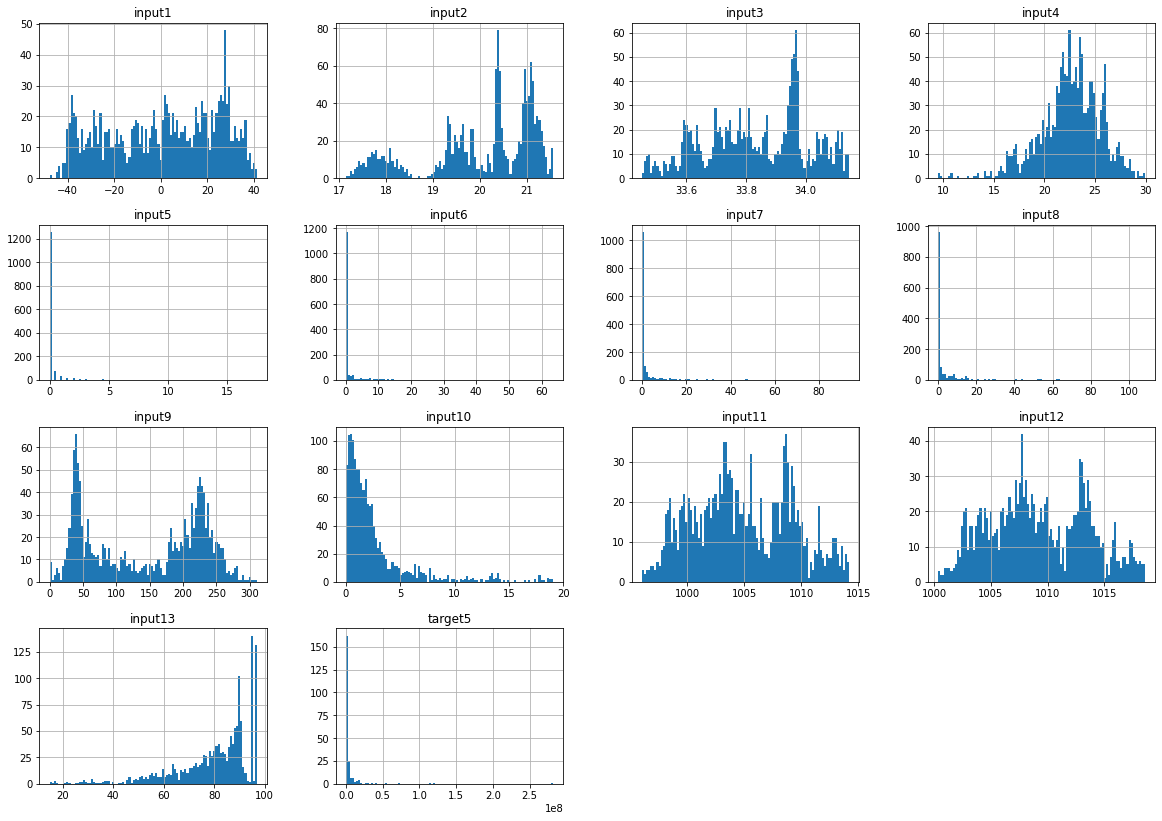

In [5]:
_ = data[inputs+outputs].hist(bins=100, figsize=(20, 14))
plt.show()

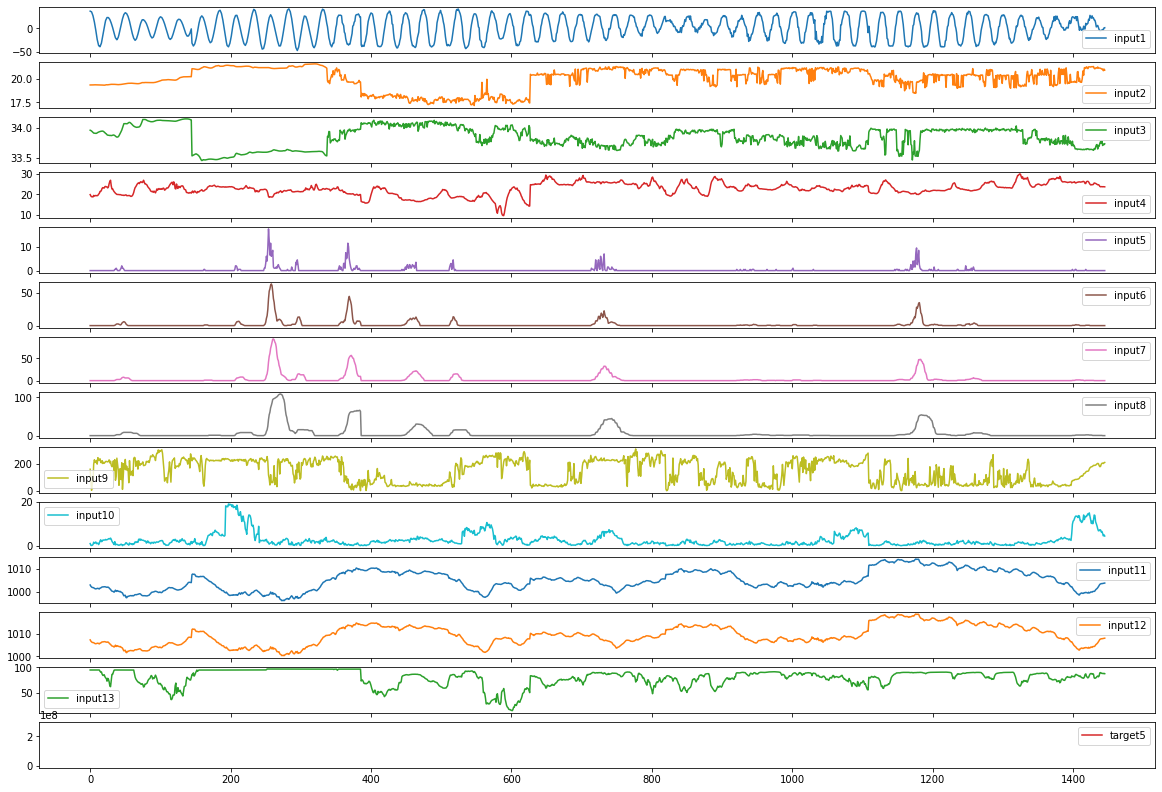

In [6]:
_ = data[inputs+outputs].plot(sharex=True, subplots=True, use_index=False, figsize=(20, 14))
plt.show()

In [7]:
neg_inputs = ['input1']
pos_inputs = [inp for inp in inputs if inp != 'input1']

We can define different cases for our experiemtn. Each case/model differs from the other case in the application of 
transformation. In first few cases we apply one transformation to both input and output data, next we apply separate
transformations to input and output data. Sine some of input data is very skewed, we try to apply a different
transformation on these input data types.

In [8]:
cases = {
    'model_minmax': {'transformation': 'minmax'},
    'model_zscore': {'transformation': 'zscore'},
    'robust': {'transformation': 'robust'},
    'quantile': {'transformation': 'quantile'},
    'power': {'transformation': 'power'},
    'log': {'transformation': [{"method": "log", "replace_nans": True, "replace_zeros": True, "features": pos_inputs},
                               {"method": "zscore", "features": neg_inputs},
                              {"method": "log", "replace_nans": True, "replace_zeros": True, "features": outputs}]},
    'zscore_robust': {'transformation': [{"method": 'zscore', "features": inputs},  {"method": "robust", "features": outputs}]},
    'zscore_log': {'transformation': [{"method": "zscore", "features": inputs}, {"method": "log", "features": outputs, "replace_nans": True}]},
    'minmax_log': {'transformation': [{"method": "minmax", "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},
    'no_log': {'transformation': [{"method": None, "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},
    'no_zscore': {'transformation': [{"method": None, "features": inputs}, {"method": "zscore", "features": outputs}]},
    'no_robust': {'transformation': [{"method": None, "features": inputs},  {"method": "robust", "features": outputs}]},
    'no_power': {'transformation': [{"method": None, "features": inputs}, {"method": "power", "features": outputs}]},
    'no_quantile': {'transformation': [{"method": None, "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_quantile': {'transformation': [{"method": 'minmax', "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_zscore': {'transformation': [{"method": 'minmax', "features": inputs},  {"method": "zscore", "features": outputs}]},

    'quantile_log': {'transformation': [{"method": 'quantile', "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},

    'minmax_robust_robust': {'transformation': [{'method': 'minmax', 'features': ['input1','input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5','input6', 'input7', 'input8']},
                                   {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_robust': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_quantile': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'quantile', 'features': outputs}]},
    'minmax_quantile_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_log_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'log', "replace_nans": True, "replace_zeros": True, 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'log', "replace_nans": True, "replace_zeros": True,  'features': outputs}]},
    'zscore_robust_log': {'transformation': [{'method': 'zscore', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_robust_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_power_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'power', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_power_robust': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'power', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'robust', "replace_nans": True, 'features': outputs}]},
    'minmax_logminmax': {'transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'minmax', "replace_nans": True, 'features': outputs}]},
    'minmax_logrobust': {'transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'robust', "replace_nans": True, 'features': outputs}]},
    'robust_logrobust': {'transformation': [{'method': 'robust', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'robust', "replace_nans": True, 'features': outputs}]}
}

In [9]:
model_args = {
    'inputs' : inputs,
    'outputs': outputs,
    'epochs': 2000,
    'patience': 50,
    'verbosity': 0,
}

In [10]:
class MyTransformationExperiment(TransformationExperiments):

    def update_paras(self, **suggested_paras):
        """This method must update all the parameters to build the dl4sq 'Model'."""
        return {
            'model': {
                'layers': {
                    "LSTM": {"config": {"units": 64}, "dropout": 0.2},
                    "Dense": {"config": {"units": 1, "activation": "relu"}},
                    "Reshape": {"config": {"target_shape": (1,1)}}
                }
            },
            'lookback': suggested_paras.get('lookback', 10),
            'batch_size': suggested_paras.get('batch_size', 16),
            'lr': suggested_paras.get('lr', 0.0001),
            'transformation': suggested_paras['transformation']
        }

In [11]:
experiment = MyTransformationExperiment(data=data, cases=cases, **model_args)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
D:\mytools\dl4seq\dl4seq\main.py:323: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



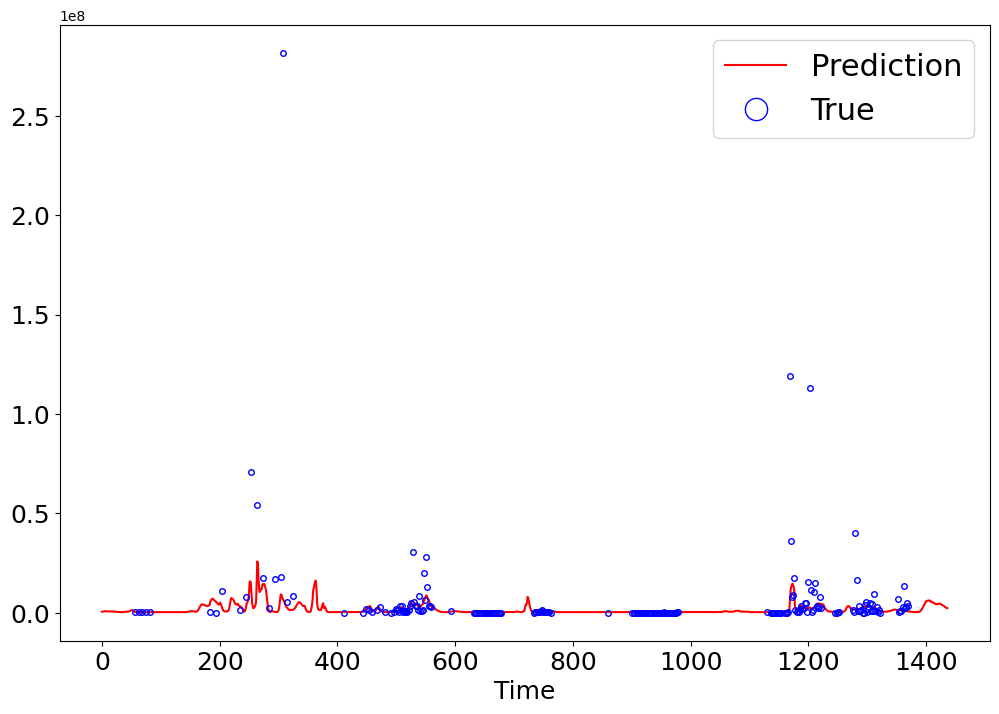

In [12]:
experiment.fit(fit_kws={'indices': 'random'})

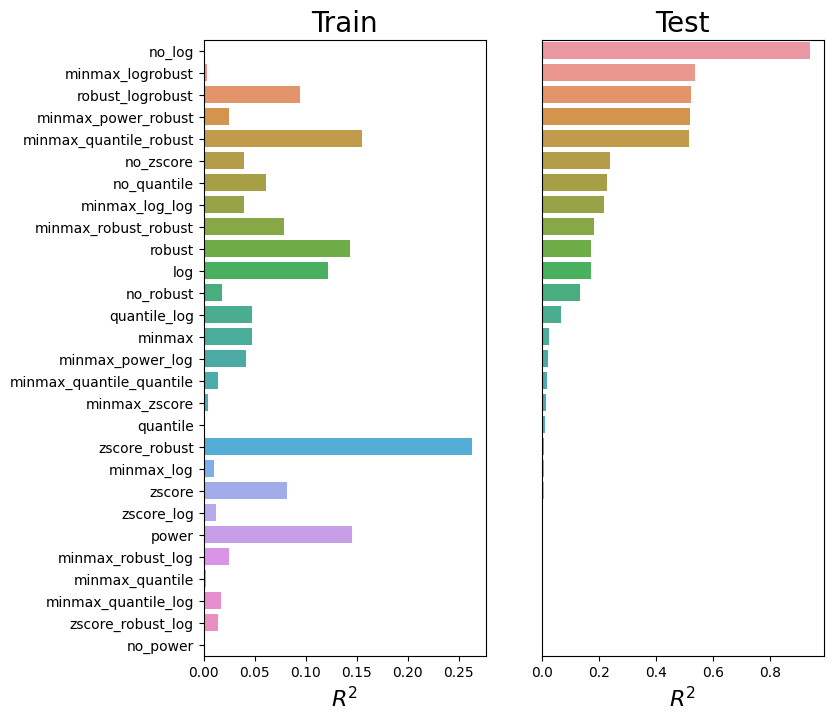

In [13]:
errs = experiment.compare_errors('r2', save=False)

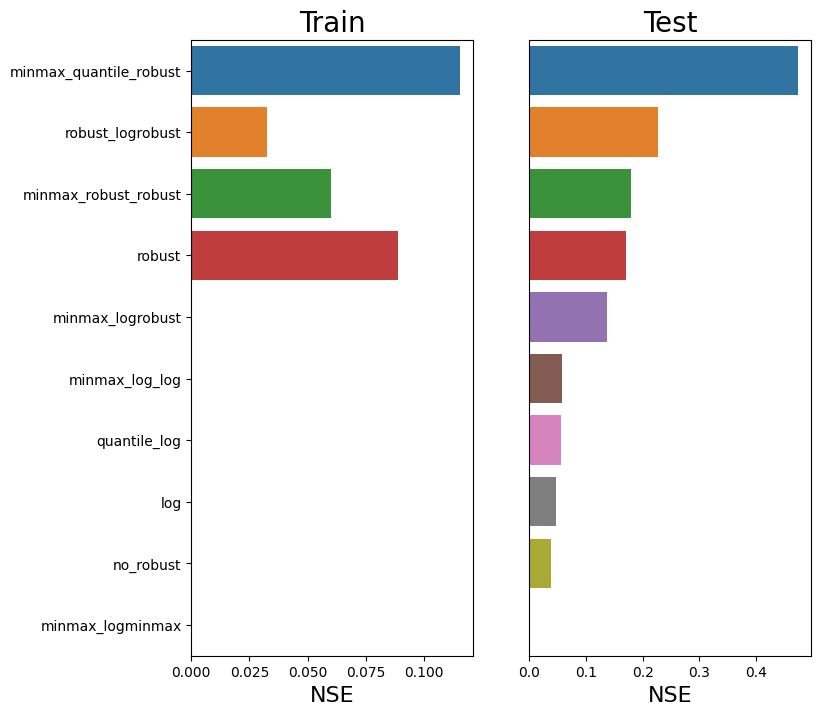

In [14]:
errs = experiment.compare_errors('nse', save=False)

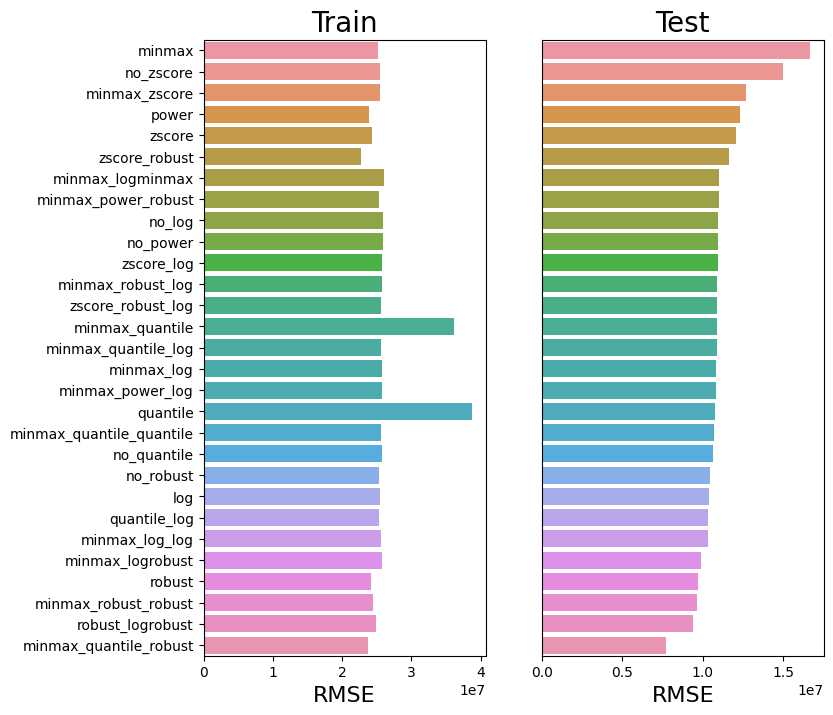

In [15]:
errs = experiment.compare_errors('rmse', save=False)

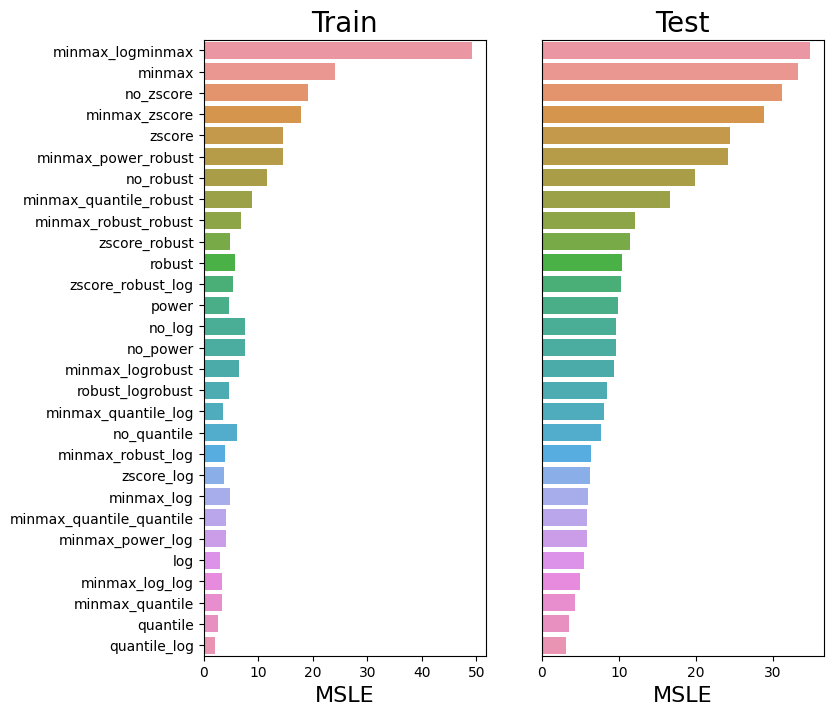

In [16]:
errs = experiment.compare_errors('msle', save=False)

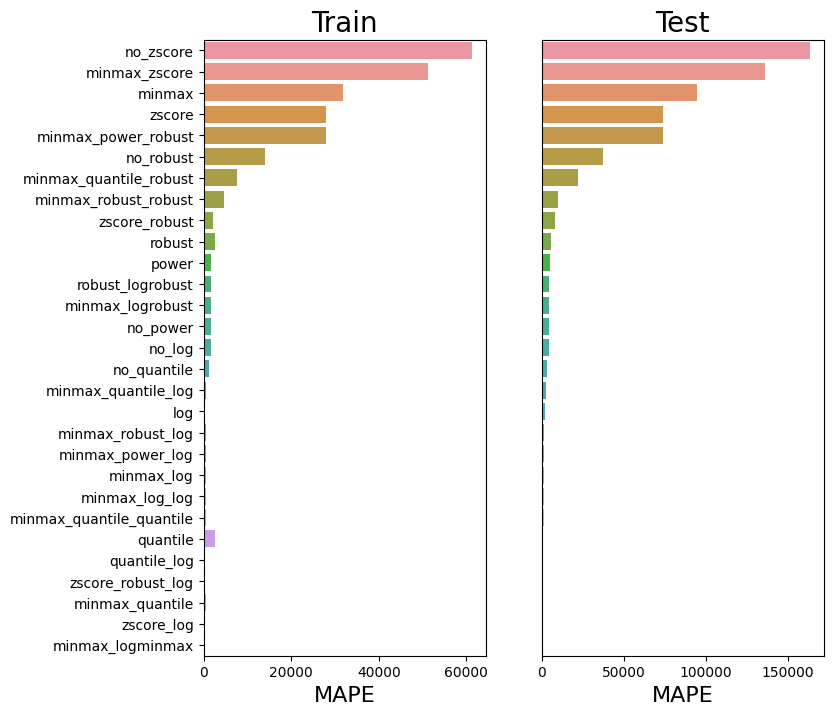

In [17]:
errs = experiment.compare_errors('mape', save=False)

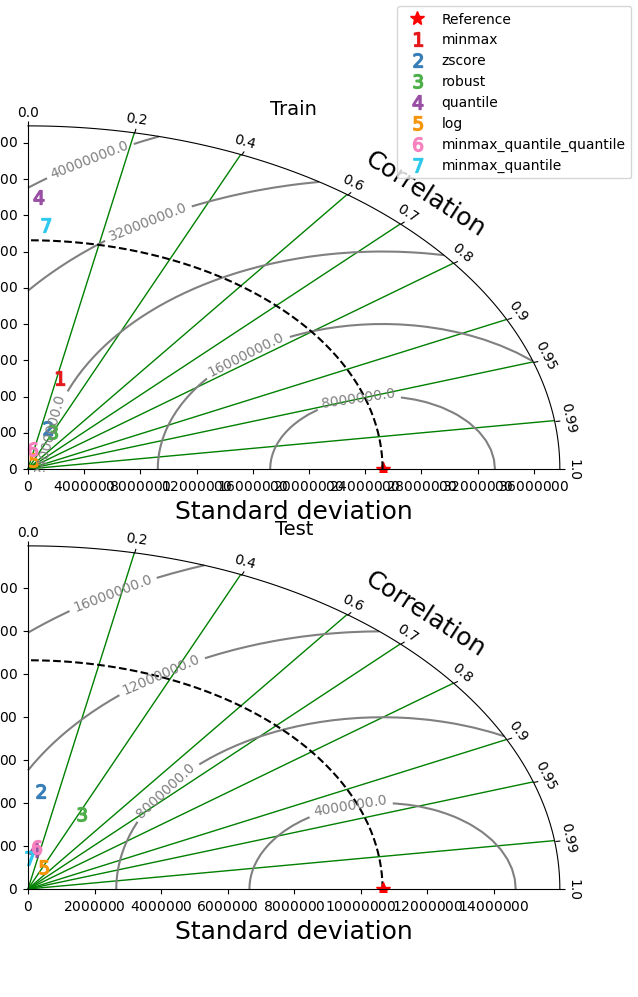

In [18]:
experiment.plot_taylor(
             include=['minmax', 'zscore', 'robust', 'quantile', 'log',
                      'minmax_quantile_quantile', 'minmax_quantile'],
             figsize=(7, 10),
             save=True,
             grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            )